In [50]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.integrate import solve_ivp

In [51]:
tol = 1e-4
K = 1
L = 4
epsilon_start = 0.1
xshoot = [-L,L]
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)
eigenvalues = []
eigenfunctions = []
col = ['r', 'b', 'g', 'c', 'm', 'k']

In [52]:
def shoot2(psi, x, epsilon):
    return [psi[1], (K * x**2 - epsilon) * psi[0]]

[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588478e-02
  4.50516634e-02]
 [3.76940965e-04 2.08377489e-03 7.88695717e-03 2.35399844e-02
  5.86293757e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583009e-02
  7.58484043e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281013e-02
  9.71899167e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048300e-02
  1.23080911e-01]
 [1.64382706e-03 8.13893182e-03 2.73391697e-02 7.15653865e-02
  1.53831247e-01]
 [2.32055909e-03 1.11600069e-02 3.63163649e-02 9.17795064e-02
  1.89559870e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171083e-01
  2.30113256e-01]
 [4.48904553e-03 2.03165046e-02 6.18486349e-02 1.45069155e-01
  2.74981570e-01]
 [6.15097107e-03 2.69674234e-02 7.92584569e-02 1.78649429e-01
  3.23220561e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868662e-01
  3.73389602e-01]
 [1.12075190e-02 4.59653552e-02 1.25381539e-01 2.59395937e-01
  4.23518000e-01]
 [1.49032591e-02 5.90146385e-02 1.547089

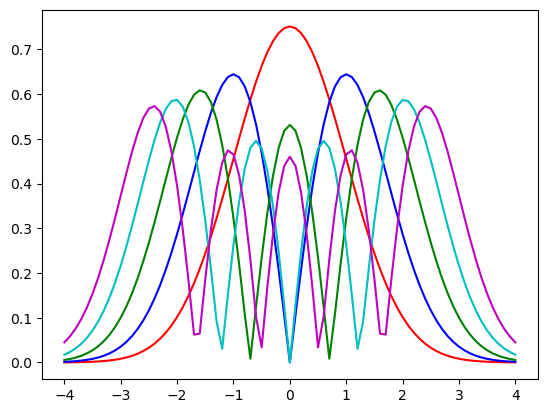

In [53]:
for modes in range(1, 6): 
    epsilon = epsilon_start 
    depsilon = 0.1
    for _ in range(1000):
        x0 = [1, np.sqrt(L**2 - epsilon)]
        y = odeint(shoot2, x0, xspan, args=(epsilon,)) 
        if abs(np.sqrt(L**2 - epsilon) * y[-1,0] + y[-1,1]) < tol:  
            eigenvalues.append(epsilon)
            norm = np.trapz(y[:, 0] * y[:, 0], xspan)
            eigenfunctions.append(np.abs(y[:, 0] / np.sqrt(norm)))
            break  

        if (-1) ** (modes + 1) * (np.sqrt(L**2 - epsilon)*y[-1, 0] + y[-1,1]) > 0:
            epsilon += depsilon
        else:
            
            epsilon -= depsilon / 2
            depsilon /= 2
            
    epsilon_start = epsilon + 0.1  
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) 
    plt.plot(xspan, abs(y[:, 0] / np.sqrt(norm)), col[modes-1]) 

A2 = eigenvalues
A1_array = np.array(eigenfunctions)
A1 = A1_array.reshape(5,-1).T

print(A1)
print(A2)
plt.show()

[[5.25330699e-04 2.98456761e-03 1.16813892e-02 3.63686000e-02
  9.51972132e-02]
 [5.65512106e-04 3.17867602e-03 1.23103621e-02 3.79293177e-02
  9.82728588e-02]
 [6.86056325e-04 3.76100125e-03 1.41972809e-02 4.26114709e-02
  1.07499796e-01]
 [8.98810813e-04 4.77370390e-03 1.74256431e-02 5.04722741e-02
  1.22627826e-01]
 [1.22563002e-03 6.29686640e-03 2.21697911e-02 6.17195708e-02
  1.43567680e-01]
 [1.69904226e-03 8.44739584e-03 2.86805596e-02 7.66574580e-02
  1.70263737e-01]
 [2.36360740e-03 1.13795764e-02 3.72731333e-02 9.56348953e-02
  2.02577475e-01]
 [3.27778429e-03 1.52862084e-02 4.83140276e-02 1.18992039e-01
  2.40177270e-01]
 [4.51615458e-03 2.03994055e-02 6.22047699e-02 1.47001309e-01
  2.82435062e-01]
 [6.17184584e-03 2.69901644e-02 7.93603878e-02 1.79802251e-01
  3.28334572e-01]
 [8.35897170e-03 3.53658263e-02 1.00181339e-01 2.17331292e-01
  3.76399121e-01]
 [1.12148677e-02 4.58645556e-02 1.25018153e-01 2.59249582e-01
  4.24649610e-01]
 [1.49018556e-02 5.88460072e-02 1.541288

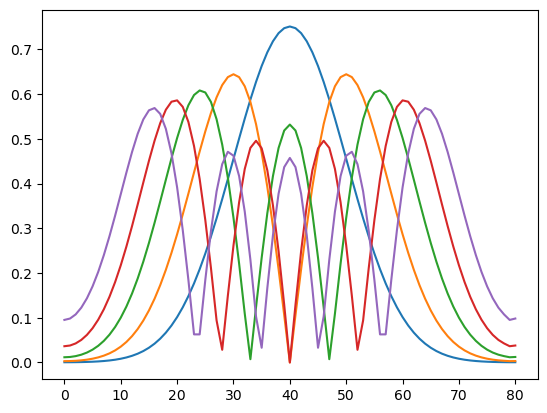

In [54]:
N = len(xspan) - 2
dx = 0.1
eigenvalues = []
eigenfunctions = []

M1 = np.zeros((N, N))
for i in range(N):
    M1[i, i] = (-2 - K * (xspan[i+1]) ** 2 * dx **2)
    for j in range(N - 1):
        M1[j, j+1] = 1
        M1[j+1, j] = 1
M1 = M1 / (dx ** 2)

M2 = np.zeros((N, N))
M2[0, 0] = 4/3
M2[0, 1] = -1/3
M2[N-1, N-2] = -1/3
M2[N-1, N-1] = 4/3
M2 = M2 / (dx ** 2)

M3 = M1 + M2 

D,V = eig(-M3)

sorted_indices = np.argsort(np.abs(D))[::-1] 
Dsort = D[sorted_indices]
Vsort =V[:, sorted_indices]


for modes in range(1,6):
    eigenvalues.append(Dsort[-modes].real)
    phi_n = Vsort[:,-modes]
    phi_n = np.insert(phi_n, 0, 4/3*phi_n[0] - 1/3*phi_n[1])
    phi_n = np.insert(phi_n, -1, 4/3*phi_n[-1] - 1/3*phi_n[-2])
    norm = np.trapz(phi_n**2, xspan)
    norm_phi_n = phi_n/ np.sqrt(norm)
    eigenfunctions.append(abs(norm_phi_n))


A4 = eigenvalues
A3 = np.array(eigenfunctions).T


print(A3)
print(A4)


plt.plot(A3)

In [55]:
tol = 1e-4
K = 1
L = 2
epsilon_start = 0.1
gamma = 0.05
A_start = 0.1
xshoot = [-L,L]
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)

eigenvalues = []
eigenfunctions = []
col = ['r', 'b', 'g', 'c', 'm', 'k']

def shoot3(psi, x, epsilon):
    return [psi[1], (gamma * abs(psi[0])**2 + K * x**2 - epsilon) * psi[0]]

def ivp2(x, psi, epsilon):
    return [psi[1], (gamma * abs(psi[0])**2 + K * x**2 - epsilon) * psi[0]]

[[0.11675587 0.34488672]
 [0.13853141 0.38228259]
 [0.16383578 0.4223643 ]
 [0.19272395 0.46378602]
 [0.22515388 0.50500201]
 [0.2609664  0.54435923]
 [0.29988519 0.58009737]
 [0.34151679 0.61034883]
 [0.38541415 0.63326415]
 [0.43089734 0.64701685]
 [0.47702265 0.64971289]
 [0.5228311  0.63991599]
 [0.56735106 0.61666441]
 [0.60959824 0.57947095]
 [0.64857569 0.52832296]
 [0.68327379 0.46373699]
 [0.7126703  0.38688763]
 [0.73577207 0.29941247]
 [0.75193364 0.20339703]
 [0.76070176 0.10137593]
 [0.76180379 0.00366715]
 [0.75516397 0.10843446]
 [0.74090335 0.21004444]
 [0.71933983 0.30557071]
 [0.69098815 0.39245797]
 [0.6565599  0.46859462]
 [0.61696201 0.53231281]
 [0.57322203 0.58241491]
 [0.52638151 0.61845343]
 [0.47743847 0.64054431]
 [0.42733242 0.6492338 ]
 [0.37694441 0.64550897]
 [0.32709699 0.63079773]
 [0.27855365 0.60690057]
 [0.23187425 0.57565907]
 [0.18731133 0.53895625]
 [0.14495385 0.49862018]
 [0.1047118  0.4564156 ]
 [0.06631618 0.41404394]
 [0.02931897 0.3730537 ]


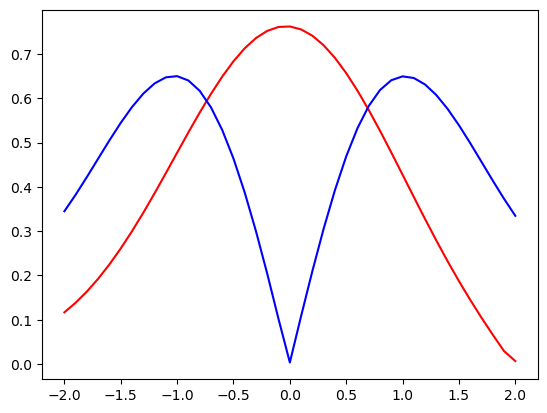

In [56]:
for modes in range(1, 3): 
    A = A_start
    dA = 0.1
    for _ in range(1000):
        epsilon = epsilon_start 
        depsilon = 0.1
        for _ in range(1000):
            x0 = [A, A * np.sqrt(L**2 - epsilon)]
            #y = odeint(shoot3, x0, xspan, args=(epsilon,))
            y = solve_ivp(ivp2, xshoot, x0, t_eval=xspan, args=(epsilon,)).y.T
            if abs((np.sqrt(L**2 - epsilon)) * y[-1,0] + y[-1,1]) < tol: 
                break  
            if (-1) ** (modes + 1) * (np.sqrt(L**2 - epsilon) * y[-1,0] + y[-1,1]) > 0:
                epsilon += depsilon
            else:
                epsilon -= depsilon / 2
                depsilon /= 2   
        epsilon_start = epsilon + 0.1  
        Area = np.trapz(y[:, 0] * y[:, 0], xspan)
        if abs(Area - 1) < tol:
            eigenvalues.append(epsilon)
            norm = np.trapz(y[:, 0] * y[:, 0], xspan)
            eigenfunctions.append(np.abs(y[:, 0] / np.sqrt(norm)))
            #eigenfunctions.append(np.abs(y[:, 0]))
            break
        if Area < 1:
            A += dA
        else:
            A -= dA / 2
            dA /= 2 
    A_start = A + 0.1         
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) 
    plt.plot(xspan, abs(y[:, 0] / np.sqrt(norm)), col[modes-1]) 
    #plt.plot(xspan, abs(y[:, 0]), col[modes-1]) 
    
A6 = eigenvalues
A5_array = np.array(eigenfunctions)
A5 = A5_array.reshape(2,-1).T

print(A5)
print(A6)
plt.show()

In [57]:
tol = 1e-4
K = 1
L = 2
epsilon_start = 0.1
gamma = -0.05
A_start = 0.1
xshoot = [-L,L]
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)

eigenvalues = []
eigenfunctions = []
col = ['r', 'b', 'g', 'c', 'm', 'k']

def shoot4(psi, x, epsilon):
    return [psi[1], (gamma * abs(psi[0])**2 + K * x**2 - epsilon) * psi[0]]

def ivp3(x, psi, epsilon):
    return [psi[1], (gamma * abs(psi[0])**2 + K * x**2 - epsilon) * psi[0]]

[[0.10951679 0.3433627 ]
 [0.13023369 0.38104726]
 [0.1543658  0.42145394]
 [0.18199099 0.4632321 ]
 [0.21309677 0.5048238 ]
 [0.24755958 0.54455895]
 [0.28514487 0.58065532]
 [0.32550705 0.61121857]
 [0.36828639 0.63436757]
 [0.41282464 0.64823956]
 [0.45821326 0.6509326 ]
 [0.50352995 0.64101449]
 [0.54783883 0.61753759]
 [0.59019035 0.58003884]
 [0.62962136 0.52853974]
 [0.66515509 0.46360158]
 [0.69580112 0.38642545]
 [0.72055541 0.2986702 ]
 [0.73858329 0.20243733]
 [0.7494664  0.10027147]
 [0.75294775 0.00483963]
 [0.74895669 0.10964481]
 [0.73760897 0.21129423]
 [0.71920667 0.30686439]
 [0.69423827 0.39381056]
 [0.6633786  0.47001538]
 [0.62748887 0.53378884]
 [0.58760689 0.58390556]
 [0.54480097 0.61988993]
 [0.50009779 0.6418163 ]
 [0.45447246 0.65021263]
 [0.40884202 0.64606855]
 [0.36406545 0.63083535]
 [0.32094365 0.60633589]
 [0.2801773  0.57443274]
 [0.24217792 0.53703697]
 [0.2072076  0.49600027]
 [0.17544602 0.45310965]
 [0.14699026 0.41008753]
 [0.12185475 0.36847337]


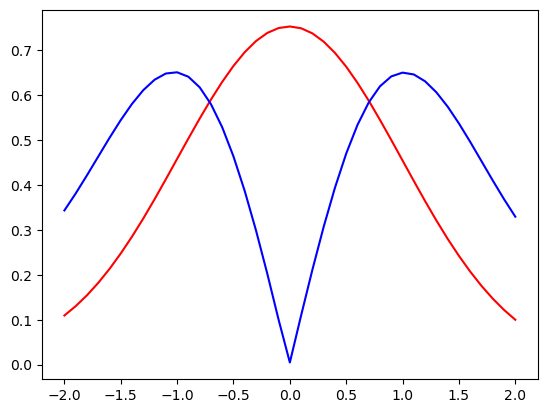

In [58]:
for modes in range(1, 3): 
    A = A_start
    dA = 0.1
    for _ in range(1000):
        epsilon = epsilon_start 
        depsilon = 0.1
        for _ in range(1000):
            x0 = [A, A * np.sqrt(L**2 - epsilon)]
            #y = odeint(shoot3, x0, xspan, args=(epsilon,))
            y = solve_ivp(ivp2, xshoot, x0, t_eval=xspan, args=(epsilon,)).y.T
            if abs((np.sqrt(L**2 - epsilon)) * y[-1,0] + y[-1,1]) < tol: 
                break  
            if (-1) ** (modes + 1) * (np.sqrt(L**2 - epsilon) * y[-1,0] + y[-1,1]) > 0:
                epsilon += depsilon
            else:
                epsilon -= depsilon / 2
                depsilon /= 2   
        epsilon_start = epsilon + 0.1  
        Area = np.trapz(y[:, 0] * y[:, 0], xspan)
        if abs(Area - 1) < tol:
            eigenvalues.append(epsilon)
            norm = np.trapz(y[:, 0] * y[:, 0], xspan)
            eigenfunctions.append(np.abs(y[:, 0] / np.sqrt(norm)))
            #eigenfunctions.append(np.abs(y[:, 0]))
            break
        if Area < 1:
            A += dA
        else:
            A -= dA / 2
            dA /= 2 
    A_start = A + 0.1         
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) 
    plt.plot(xspan, abs(y[:, 0] / np.sqrt(norm)), col[modes-1]) 
    #plt.plot(xspan, abs(y[:, 0]), col[modes-1]) 
    
A6 = eigenvalues
A5_array = np.array(eigenfunctions)
A5 = A5_array.reshape(2,-1).T

print(A5)
print(A6)
plt.show()

In [59]:
epsilon = 1
L = 2
xspan = [-L, L]
K = 1
def ivp2(x, psi):
    return [psi[1], (K * x**2 - epsilon) * psi[0]]

In [60]:
def solve_tol(TOL, Method):
    y0 = [1, np.sqrt(K * L**2 - 1)]
    options = {'rtol': TOL, 'atol':TOL}
    sol = solve_ivp(ivp2, xspan, y0, method = Method, **options)
    stepsize = np.mean(np.diff(sol.t))
    return sol, stepsize

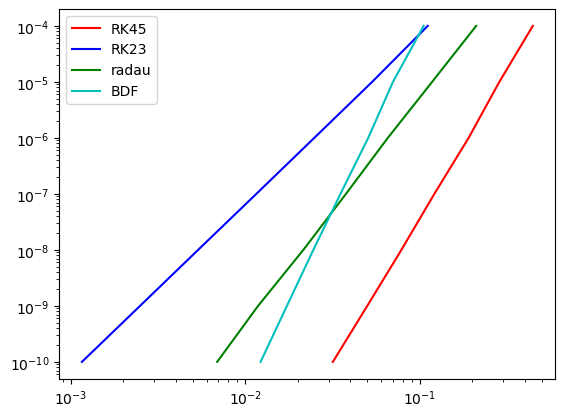

In [61]:
stepsize_RK45=[]
stepsize_RK23=[]
stepsize_Radau=[]
stepsize_BDF=[]
Tol = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
for i in range(0, len(Tol)):
    TOL = Tol[i]
    stepsize_RK45.append(solve_tol(TOL, 'RK45')[1])
    stepsize_RK23.append(solve_tol(TOL, 'RK23')[1])
    stepsize_Radau.append(solve_tol(TOL, 'Radau')[1])
    stepsize_BDF.append(solve_tol(TOL, 'BDF')[1])

plt.loglog(stepsize_RK45, Tol, label = 'RK45', color = col[0])
plt.loglog(stepsize_RK23, Tol, label = 'RK23', color = col[1])
plt.loglog(stepsize_Radau, Tol, label = 'radau', color = col[2])
plt.loglog(stepsize_BDF, Tol, label = 'BDF', color = col[3])
plt.legend()

In [62]:
A9 = []
A9.append(np.polyfit(np.log(stepsize_RK45), np.log(Tol), 1)[0])
A9.append(np.polyfit(np.log(stepsize_RK23), np.log(Tol), 1)[0])
A9.append(np.polyfit(np.log(stepsize_Radau), np.log(Tol), 1)[0])
A9.append(np.polyfit(np.log(stepsize_BDF), np.log(Tol), 1)[0])
print(A9)

[5.244667561772167, 3.019099529504503, 4.038199269261615, 6.457512609631293]


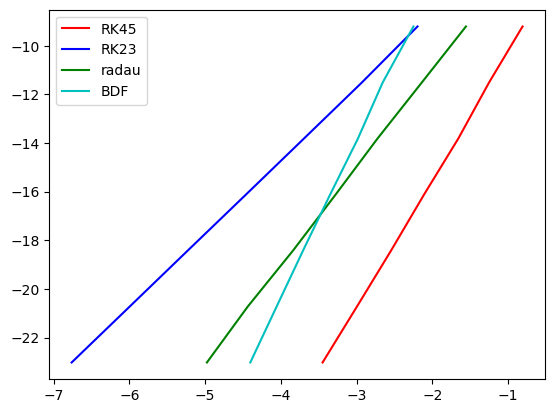

In [63]:
plt.plot(np.log(stepsize_RK45), np.log(Tol), label = 'RK45', color = col[0])
plt.plot(np.log(stepsize_RK23), np.log(Tol), label = 'RK23', color = col[1])
plt.plot(np.log(stepsize_Radau), np.log(Tol), label = 'radau', color = col[2])
plt.plot(np.log(stepsize_BDF), np.log(Tol), label = 'BDF', color = col[3])
plt.legend()

In [64]:
tol = 1e-4
K = 1
L = 4
epsilon_start = 0.1
xshoot = [-L,L]
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)
eigenvalues = []
eigenfunctions = []
col = ['r', 'b', 'g', 'c', 'm', 'k']
def ivp3(x, psi, epsilon):
    return [psi[1], (K * x**2 - epsilon) * psi[0]]

[0.9997357911430298, 2.9990026018582303, 4.998463054653258, 6.997581001278006, 8.996254249569017]


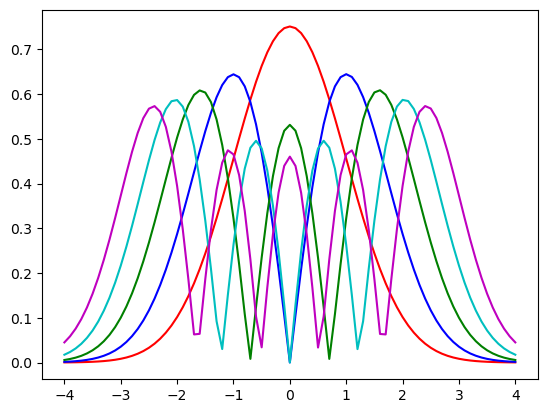

In [65]:
for modes in range(1, 6): 
    epsilon = epsilon_start 
    depsilon = 0.1
    for _ in range(1000):
        x0 = [1, np.sqrt(L**2 - epsilon)]
        y = solve_ivp(ivp3, xshoot, x0, t_eval=xspan, args=(epsilon,)).y.T 
        if abs(np.sqrt(L**2 - epsilon) * y[-1,0] + y[-1,1]) < tol:  
            eigenvalues.append(epsilon)
            norm = np.trapz(y[:, 0] * y[:, 0], xspan)
            eigenfunctions.append(np.abs(y[:, 0] / np.sqrt(norm)))
            break  

        if (-1) ** (modes + 1) * (np.sqrt(L**2 - epsilon)*y[-1, 0] + y[-1,1]) > 0:
            epsilon += depsilon
        else:
            
            epsilon -= depsilon / 2
            depsilon /= 2
            
    epsilon_start = epsilon + 0.1  
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) 
    plt.plot(xspan, abs(y[:, 0] / np.sqrt(norm)), col[modes-1]) 

A2 = eigenvalues

print(A2)
plt.show()

In [66]:
L = 4
K = 1
J = 1
eigenvalue1 = []
eigenfunction1 = []
eigenvalue2 = []
eigenfunction2 = []
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)
def h(x):
    return [1, 2 * x, 4 * x**2 - 2, 8 * x**3 - 12 * x, 16 * x**4 - 48 * x**2 + 12]

In [67]:
for j in range(0, 5):
    eigenvalue1.append(100 * abs(A2[j] - (2 * j + 1))/(2 * j + 1))
    eigenvalue2.append(100 * abs(A4[j] - (2 * j + 1))/(2 * j + 1))
    J = J * (j + 1)
    phi = np.exp(- xspan * xspan / 2) * h(xspan)[j] / np.sqrt(J * 2**j*np.sqrt(np.pi))
    A1j = A1[:,j]
    A3j = A3[:,j]
    eigenfunction1.append(np.trapz(abs(A1j - phi)**2))
    eigenfunction2.append(np.trapz(abs(A3j - phi)**2))
    
A10 = eigenfunction1
A11 = eigenvalue1
A12 = eigenfunction2
A13 = eigenvalue2
print(A10)
print(A11)
print(A12)
print(A13)

[5.182349213415948e-11, 14.999997234633156, 6.375636323826653, 12.499781501969537, 7.6007502126211595]
[0.026420885697020502, 0.033246604725656326, 0.030738906934839605, 0.034557124599908305, 0.04161944923314959]
[2.3371031642860944e-06, 14.99999762798211, 6.380587426474931, 12.499804071918387, 7.577753038035905]
[0.0626477036968609, 0.10536673372400311, 0.1718688039866656, 0.2801621353897182, 0.5488885888099778]
